## Задача 1
### Постройте график
### Назовите график
### Сделайте именование оси x и оси y
### Сделайте выводы

### 1.1. Скачать следующие данные: kc-house-data и laptop_price

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('kc-house-data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости


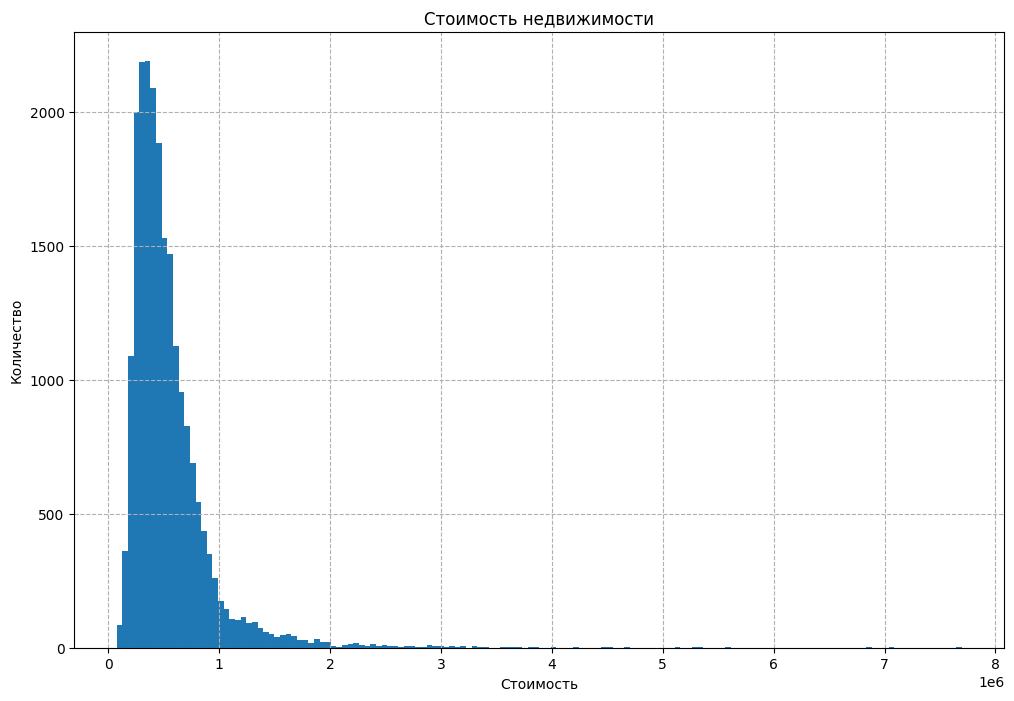

In [66]:
plt.figure(figsize=(12, 8))
plt.hist(df['price'], bins=150)
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.grid(linestyle='dashed')


In [63]:
df['price'].describe().astype(int)

count      21613
mean      540088
std       367127
min        75000
25%       321950
50%       450000
75%       645000
max      7700000
Name: price, dtype: int64

### 1.3. Изучите распределение квадратуры жилой


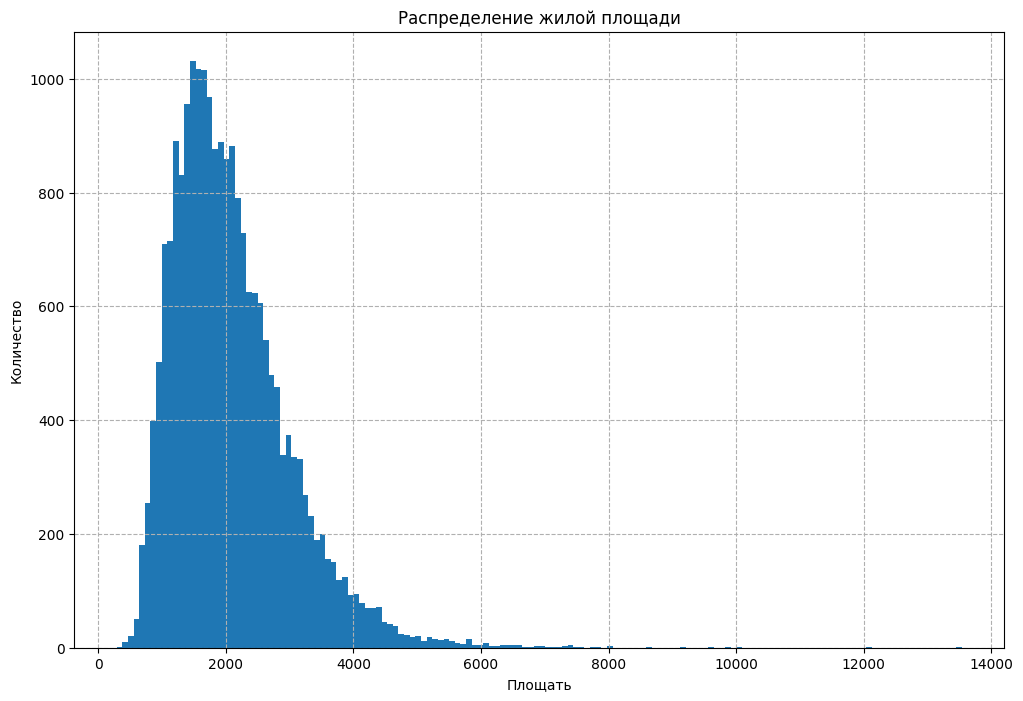

In [68]:
plt.figure(figsize=(12, 8))
plt.hist(df['sqft_living'], bins=150)
plt.title('Распределение жилой площади')
plt.xlabel('Площать')
plt.ylabel('Количество')
plt.grid(linestyle='dashed')


In [64]:
df['sqft_living'].describe().astype(int)

count    21613
mean      2079
std        918
min        290
25%       1427
50%       1910
75%       2550
max      13540
Name: sqft_living, dtype: int64

### 1.4. Изучите распределение года постройки


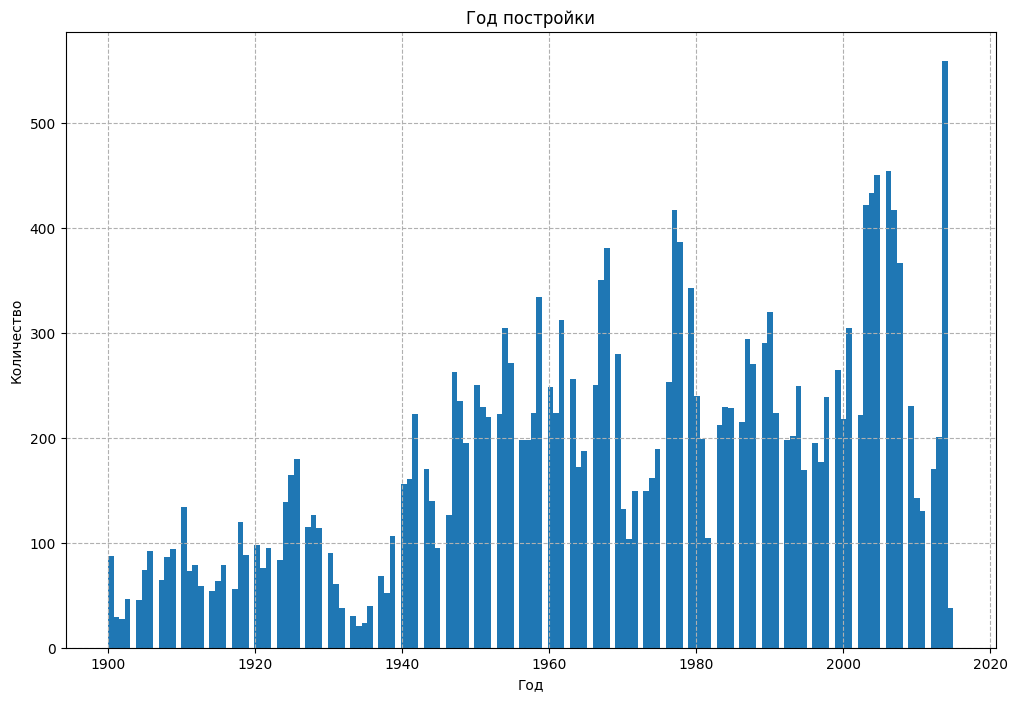

In [70]:
plt.figure(figsize=(12, 8))
plt.hist(df['yr_built'], bins=150)
plt.title('Год постройки')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid(linestyle='dashed')

In [71]:
df['yr_built'].describe().astype(int)

count    21613
mean      1971
std         29
min       1900
25%       1951
50%       1975
75%       1997
max       2015
Name: yr_built, dtype: int64


## 2 задача
### 2.1. Изучите распределение домов от наличия вида на набережную
#### Постройте график
#### Сделайте выводы


In [34]:
waterfront_df = df['waterfront'].value_counts()
waterfront_df.head()

waterfront
0    21450
1      163
Name: count, dtype: int64

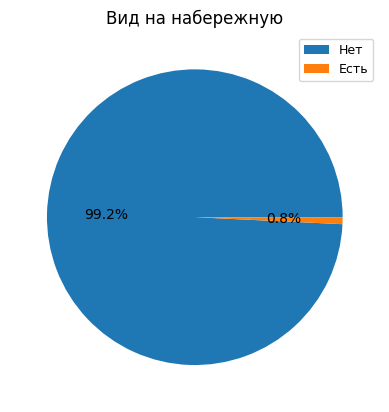

In [57]:
plt.pie(waterfront_df.values, autopct='%.1f%%');
plt.title('Вид на набережную')
plt.legend(['Нет', 'Есть'], loc='upper right', prop={'size': 9});

### 2.2. Изучите распределение этажей домов



In [43]:
floors_df = df['floors'].value_counts()
floors_df

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

Text(0, 0.5, 'Количество домов')

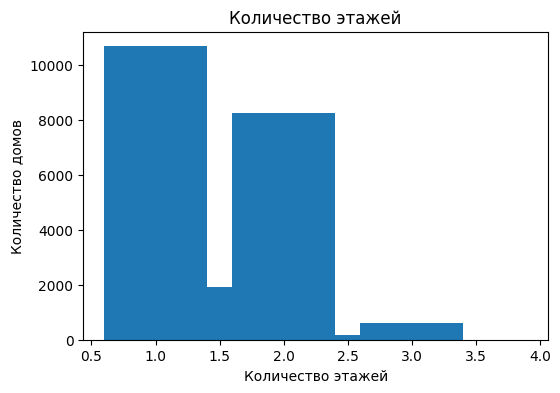

In [52]:
plt.figure(figsize=(6, 4))
plt.bar(floors_df.index, floors_df.values)
plt.title('Количество этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')


### 2.3. Изучите распределение состояния домов

In [72]:
condition_df = df['condition'].value_counts()
condition_df

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

Text(0, 0.5, 'Количество домов')

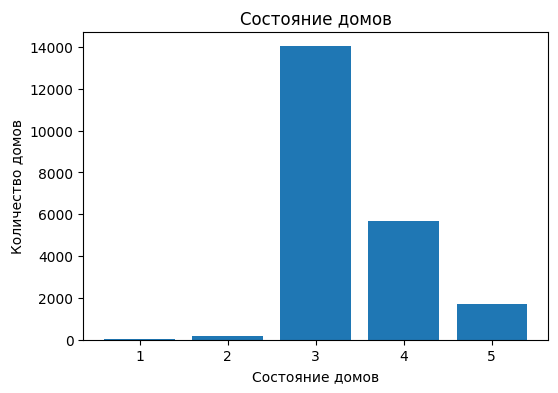

In [73]:
plt.figure(figsize=(6, 4))
plt.bar(condition_df.index, condition_df.values)
plt.title('Состояние домов')
plt.xlabel('Состояние домов')
plt.ylabel('Количество домов')



## 3 задача
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

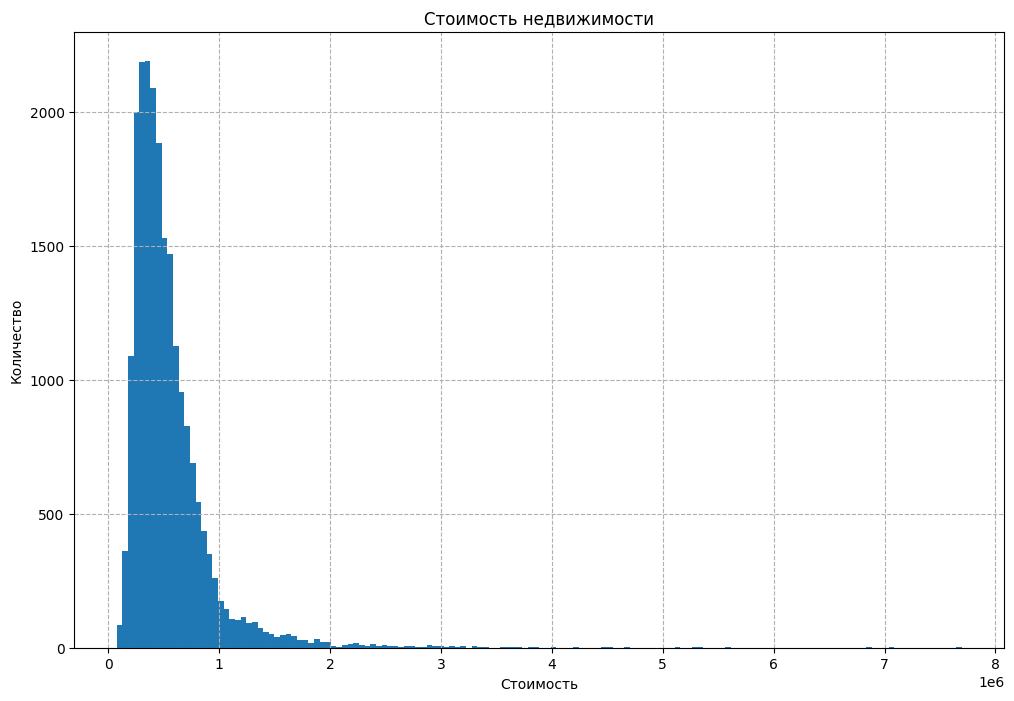

In [74]:
plt.figure(figsize=(12, 8))
plt.hist(df['price'], bins=150)
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.grid(linestyle='dashed')


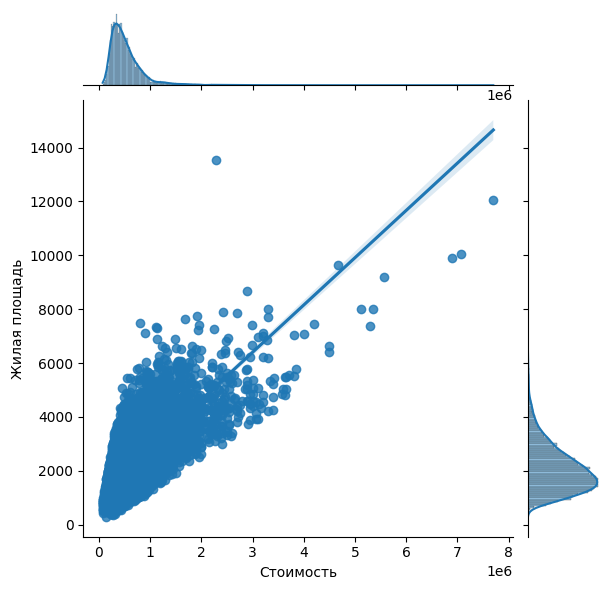

In [76]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');
plt.xlabel('Стоимость')
plt.ylabel('Жилая площадь');

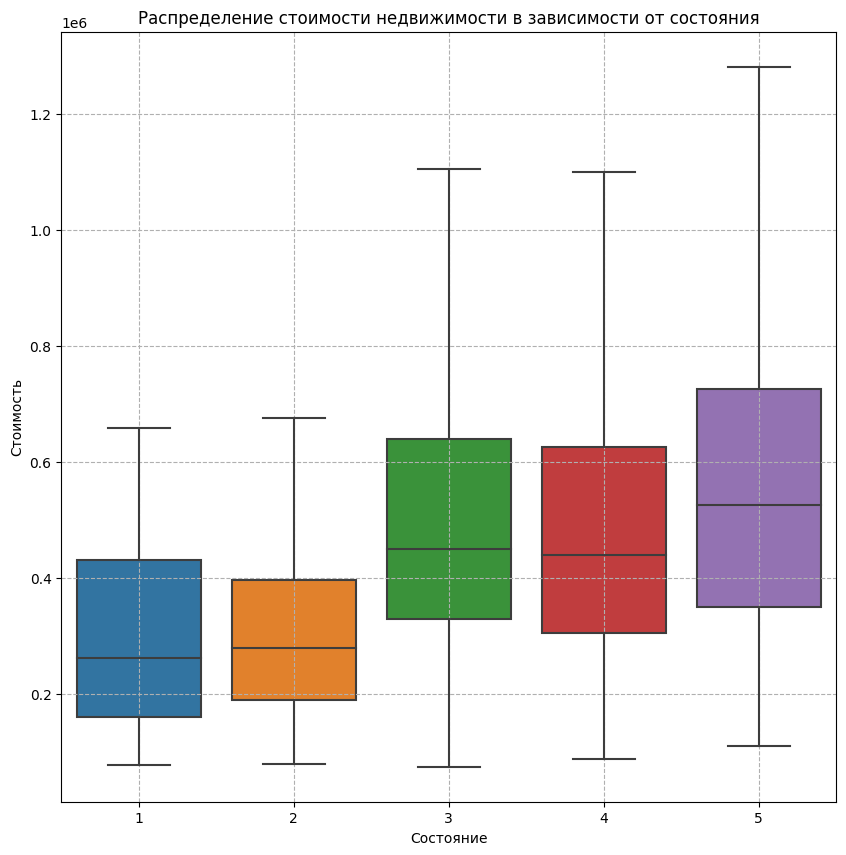

In [77]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['condition'], y=df['price'], whis=1.5, showfliers=False)
plt.title('Распределение стоимости недвижимости в зависимости от состояния')
plt.grid(linestyle='dashed')
plt.xlabel('Состояние')
plt.ylabel('Стоимость');

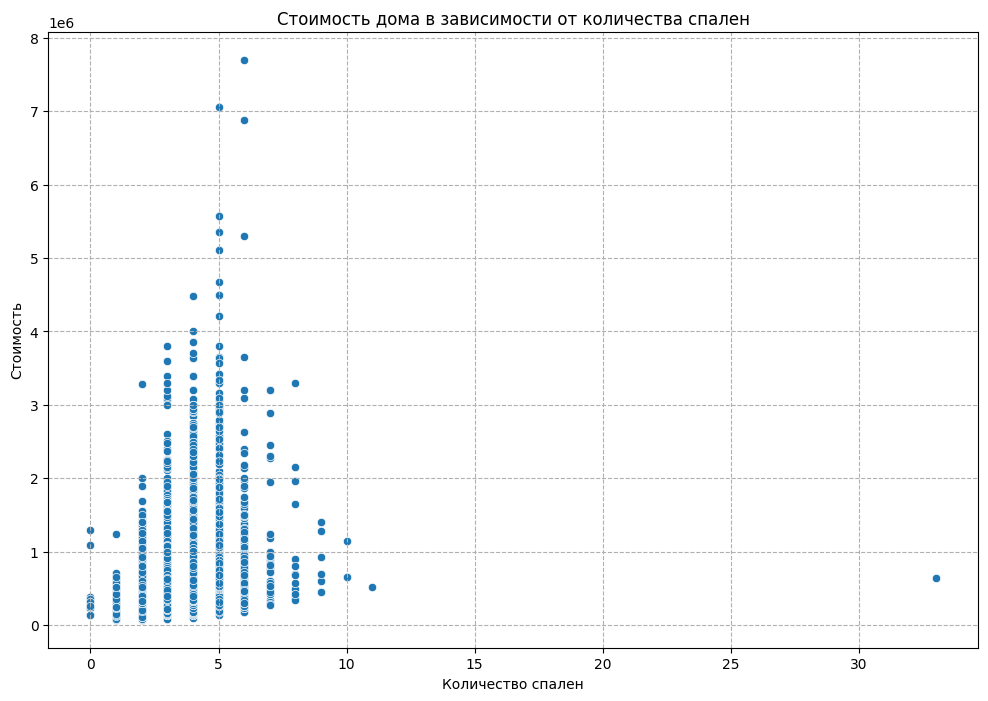

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(y=df['price'], x=df['bedrooms'])
plt.title('Стоимость дома в зависимости от количества спален')
plt.ylabel('Стоимость')
plt.xlabel('Количество спален')
plt.grid(linestyle='dashed')

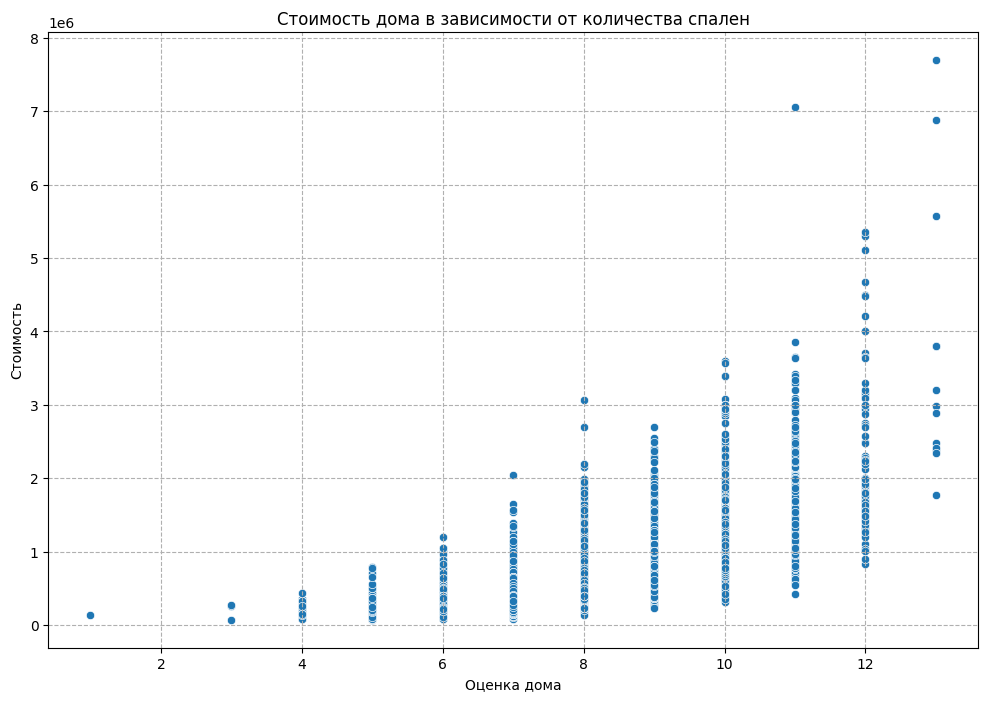

In [80]:
plt.figure(figsize=(12, 8))
sns.scatterplot(y=df['price'], x=df['grade'])
plt.title('Стоимость дома в зависимости от количества спален')
plt.ylabel('Стоимость')
plt.xlabel('Оценка дома')
plt.grid(linestyle='dashed')

### Выводы: 
#### Больше всего на стоимость влияет состояное дома, на графиках видна сильная линейная зависимость. Так же стоимость дома зависит как от количественных показателей, таких как площадь общая и жилая, количество этажей, количество спален и ванных комнат и т.п.

#### Соответственно, на приведенных выше графиках видно, что чем больше площади и лучше состояние, тем выше стоимость дома. 